In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
Tesla=web.DataReader("TSLA",'yahoo',datetime.datetime(2012,1,1),datetime.datetime(2017,1,1))
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [5]:
Ford=web.DataReader("F",'yahoo',datetime.datetime(2012,1,1),datetime.datetime(2017,1,1))
Ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192


In [6]:
GM=web.DataReader("GM",'yahoo',datetime.datetime(2012,1,1),datetime.datetime(2017,1,1))
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.299799
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.377232
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.167059
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.747812
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.685862


2. Visualize the stock prices

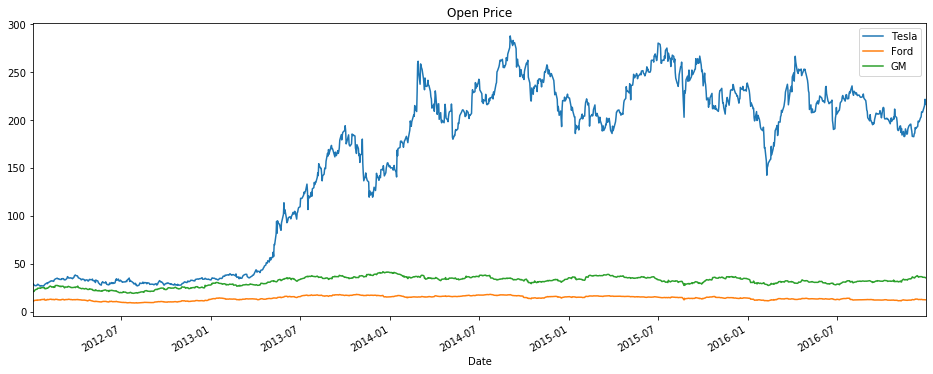

In [7]:
Tesla['Open'].plot(label='Tesla',title='Open Price',figsize=(16,6))
Ford['Open'].plot(label='Ford')
GM['Open'].plot(label='GM')
plt.legend();

Trading Volumes 

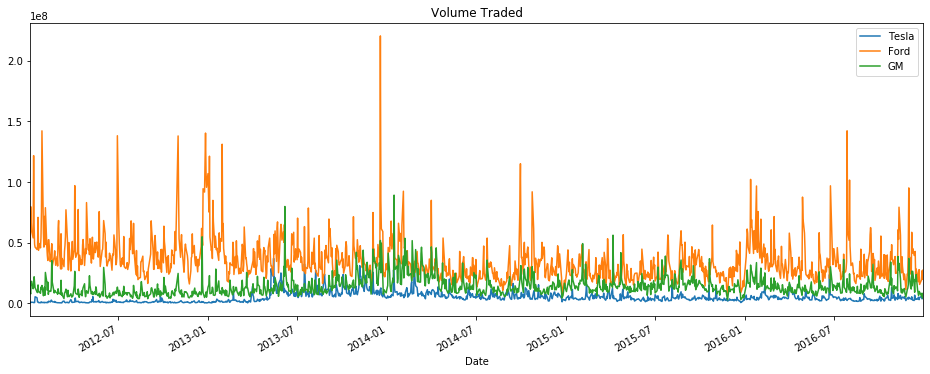

In [8]:
Tesla['Volume'].plot(label='Tesla',title='Volume Traded',figsize=(16,6))
Ford['Volume'].plot(label='Ford')
GM['Volume'].plot(label='GM')
plt.legend();

In [9]:
Ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

Find that the volume traded for Ford is very high on 2013-12-18. Searched online to check what happened on that day.
**On 2013-12-28: "Ford shares fell sharply Wednesday after the company warned the cost of its aggressive push to launch new products would cut into profits next year."-CNN

**Generate 'total traded' var

In [10]:
Tesla['Total Traded']=Tesla['Open']*Tesla['Volume']
Ford['Total Traded']=Ford['Open']*Ford['Volume']
GM['Total Traded']=GM['Open']*GM['Volume']

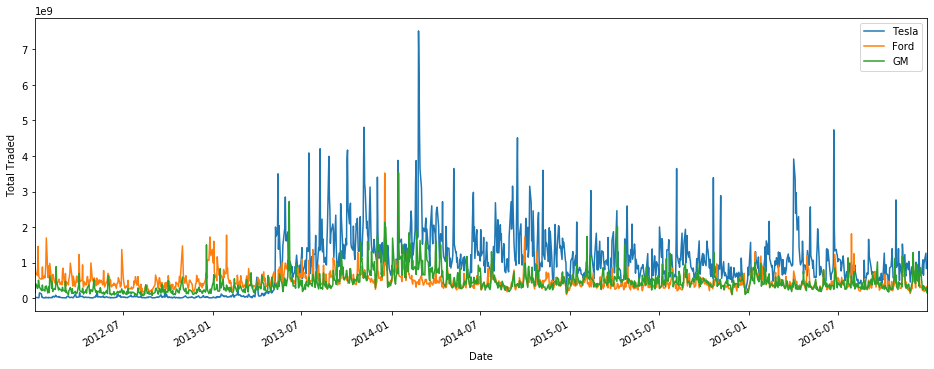

In [11]:
Tesla['Total Traded'].plot(figsize=(16,6),label='Tesla')
Ford['Total Traded'].plot(label='Ford')
GM['Total Traded'].plot(label='GM')
plt.legend()
plt.ylabel('Total Traded');

For Tesla, try to find out the date that it had the largest total traded value.

In [12]:
Tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

Get the moving averages

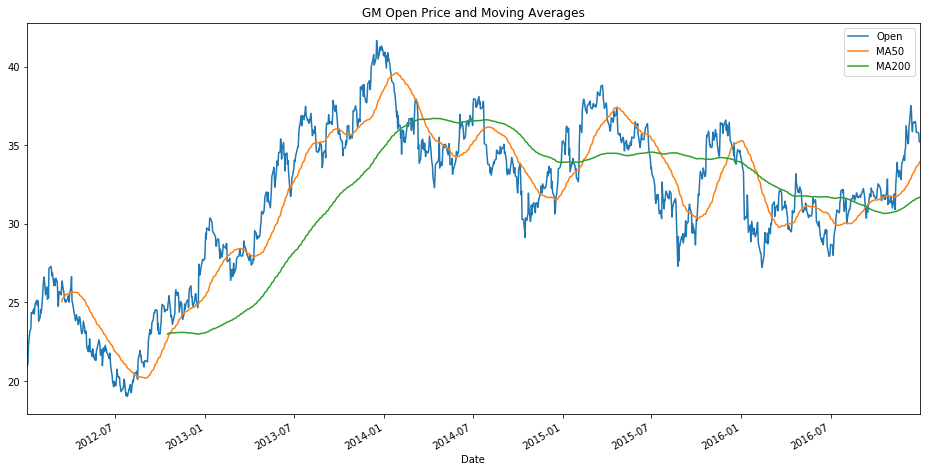

In [13]:
GM['MA50'] = GM['Open'].rolling(window=50).mean()
GM['MA200'] = GM['Open'].rolling(window=200).mean()
GM[['Open','MA50','MA200']].plot(title='GM Open Price and Moving Averages',figsize=(16,8));

See the relationship between the stocks of the three companies

In [14]:
from pandas.plotting import scatter_matrix

In [15]:
car=pd.concat([Tesla['Open'],Ford['Open'],GM['Open']],axis=1)
car.columns=['Tesla Open','Ford Open','GM Open']
car.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,28.940001,11.00,20.830000
2012-01-04,28.209999,11.15,21.049999
2012-01-05,27.760000,11.33,21.100000
2012-01-06,27.200001,11.74,22.260000
2012-01-09,27.000000,11.83,23.200001


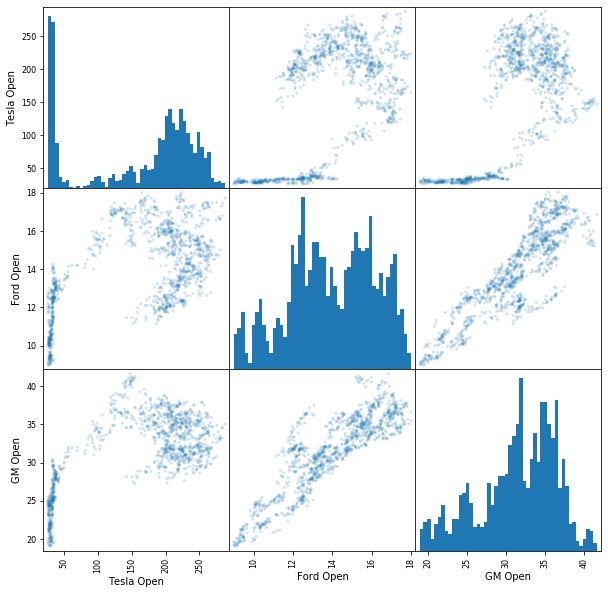

In [16]:
scatter_matrix(car,alpha=0.2,figsize=(10,10),hist_kwds={'bins':50});

## Create a candlestick chart!

In [17]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [18]:
Tesla_Dec = Tesla.loc['2016-12':'2016-12']
Tesla_Dec.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2016-12-01,188.529999,181.000000,188.250000,181.880005,5126400,181.880005,9.650448e+08
2016-12-02,184.880005,180.000000,182.880005,181.470001,4042300,181.470001,7.392558e+08
2016-12-05,188.889999,182.509995,182.509995,186.800003,4072200,186.800003,7.432172e+08
2016-12-06,186.580002,182.679993,185.520004,185.850006,3391600,185.850006,6.292096e+08
2016-12-07,193.399994,185.000000,186.149994,193.149994,5461900,193.149994,1.016733e+09


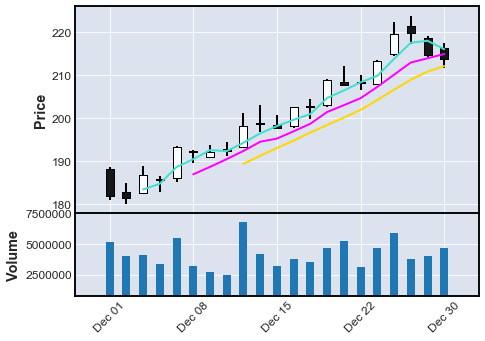

None


In [20]:
print(mpf.plot(Tesla_Dec,type='candle',mav=(3,6,9),volume=True))
#if delete volume=True, there wont be volumes in the chart

**The "time-interpretation" of the mav integers depends on the frequency of the data, because the mav integers are the number of data points used in the Moving Average (not the number of days or minutes, etc). 

In [ ]:
# from mplfinance.original_flavor import candlestick_ohlc (if we want to use old method to plot candlestick chart)

## Analyzing returns

In [21]:
Tesla['Returns'] = (Tesla['Close'] / Tesla['Close'].shift(1) ) - 1
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [22]:
Ford['Returns']=Ford['Close'].pct_change(1)
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192,6.386011e+08,0.007686


In [23]:
GM['Returns']=GM['Close'].pct_change(1)
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,Returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.299799,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.377232,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.167059,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.747812,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.685862,2.803604e+08,NaN,NaN,-0.003490


In [56]:
#To make the format of plots look better, use seaborn
import seaborn as sns
sns.set()

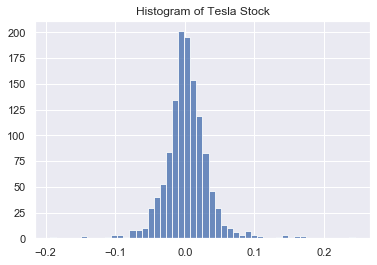

In [61]:
Tesla['Returns'].hist(bins=50,alpha=0.8)
plt.title('Histogram of Tesla Stock');

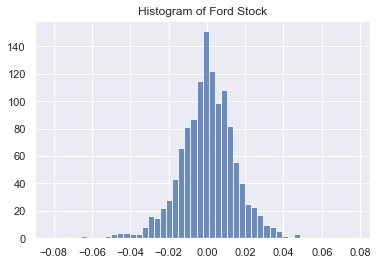

In [65]:
Ford['Returns'].hist(bins=50,alpha=0.8)
plt.title('Histogram of Ford Stock');

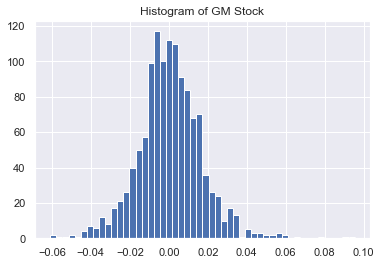

In [53]:
GM['Returns'].hist(bins=50)
plt.title('Histogram of GM Stock');

**we can also plot the histogram in a single plot

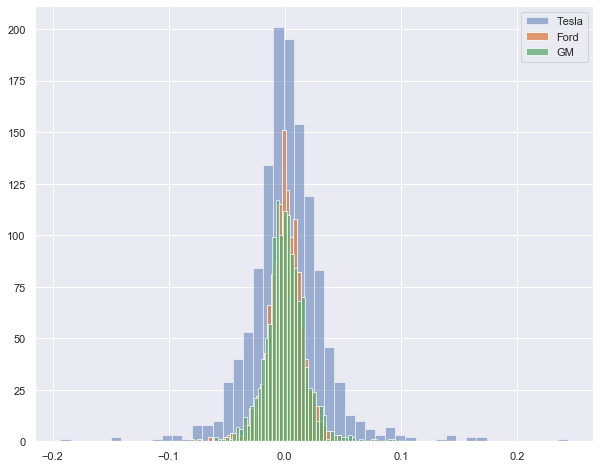

In [67]:
Tesla['Returns'].hist(bins=50,label='Tesla',figsize=(10,8),alpha=0.5)
Ford['Returns'].hist(bins=50,label='Ford',alpha=0.8)
GM['Returns'].hist(bins=50,label='GM',alpha=0.7)
plt.legend();

We can see that Tesla's stock is the most volatile, comparing with that of Ford and GM.

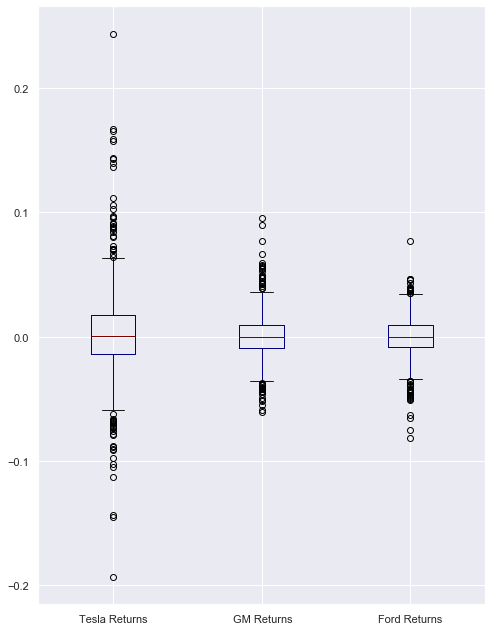

In [80]:
returns = pd.concat([Tesla['Returns'],GM['Returns'],Ford['Returns']],axis=1)
returns.columns = ['Tesla Returns',' GM Returns','Ford Returns']
returns.plot(kind='box',figsize=(8,11),colormap='jet')

Using scatter matrix to compare the returns of the three stocks.

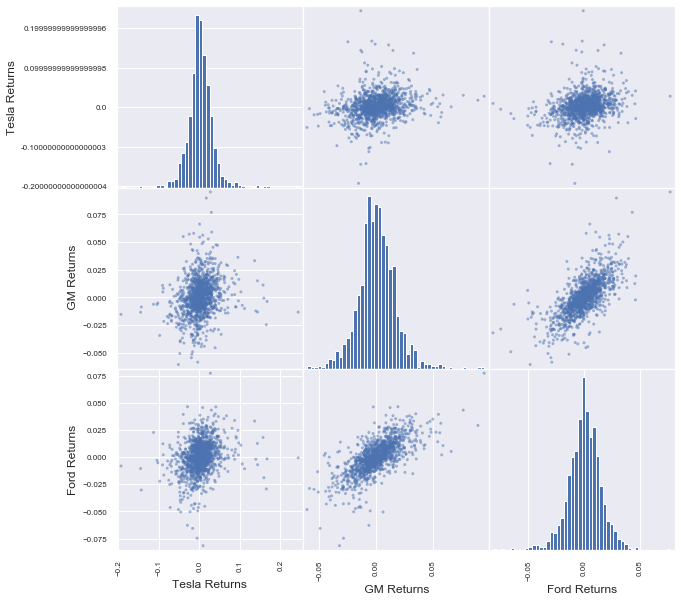

In [72]:
scatter_matrix(returns,figsize=(10,10),alpha=0.5,hist_kwds={'bins':50});

From the scatter matrix, we may find out that GM returns are correlated to Ford returns.
To have a closer look, create a scatter plot of the correlated returns of the two stocks.


Pandas makes this very simple to calculate with its cumprod() method.

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()


In [87]:
Tesla['Cumulative Return'] = (1 + Tesla['Returns']).cumprod()

In [88]:
Ford['Cumulative Return'] = (1 + Ford['Returns']).cumprod()

In [86]:
GM['Cumulative Return'] = (1 + GM['Returns']).cumprod()

In [89]:
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Returns,Cumulative Return
Date,,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.012635,0.970442


In [90]:
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.687118,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.804530,8.889359e+08,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.004824,7.690521e+08,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.087703,7.025298e+08,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.149862,6.386011e+08,0.007686,1.060198


In [91]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,Returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.299799,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.377232,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.167059,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.747812,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.685862,2.803604e+08,NaN,NaN,-0.003490,1.085036


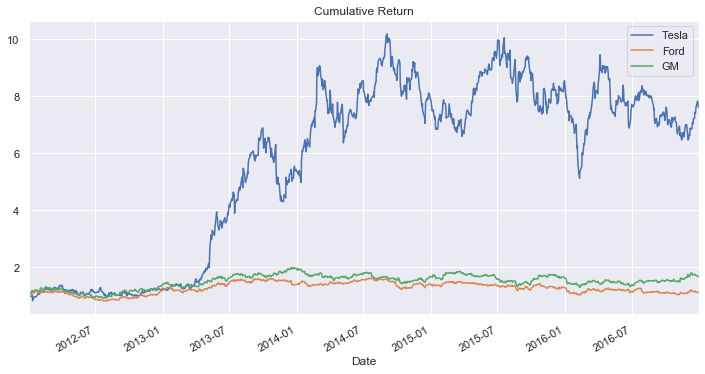

In [92]:
Tesla['Cumulative Return'].plot(label='Tesla',title='Cumulative Return',figsize=(12,6))
Ford['Cumulative Return'].plot(label='Ford')
GM['Cumulative Return'].plot(label='GM')
plt.legend();